In [1]:
import numpy as np
import pandas as pd

## Columns

**OpenCivitas**

- ANNO
- COMUNE_CAT_COD: codice comune
- SPESA_CCC_FC01A: entrate tributarie
- SPESA_CCC_FC01B: ufficio tecnico
- SPESA_CCC_FC01C: anagrafe, stato civile, leva e servizio statistico
- SPESA_CCC_FC01D: altri servizi generali
- SPESA_CCC_FC02U: polizia locale
- SPESA_CCC_FC03U: istruzione pubblica
- SPESA_CCC_FC04A: viabilita'
- SPESA_CCC_FC04B: trasporto pubblico e servizi connessi
- SPESA_CCC_FC05A: gestione del territorio
- SPESA_CCC_FC05B: ambiente
- SPESA_CCC_FC06A: settore sociale
- SPESA_CCC_FC06B: asili nido

**Data Demografici**

- cod istat
- cod cat
- cod catasto
- ...

**MEF Irpef**

- Numero contribuenti
- Reddito da fabbricati
- Reddito da lavoro dipendente e assimilati
- Reddito da pensione
- Reddito da lavoro autonomo (compresi nulli)
- Reddito spettanza imprenditore ordinaria (compresi nulli)
- Reddito spettanza imprenditore semplificata (compresi nulli)
- Reddito da partecipazione (compresi nulli)
- Reddito imponibile, Imposta netta
- Reddito imponibile addizionale
- Addizionale regionale dovuta
- Addizionale comunale dovuta
- Reddito complessivo minore o uguale a zero euro
- Reddito complessivo da 0 a 10000 euro
- Reddito complessivo da 10000 a 15000 euro
- Reddito complessivo da 15000 a 26000 euro
- Reddito complessivo da 26000 a 55000 euro
- Reddito complessivo da 55000 a 75000 euro
- Reddito complessivo da 75000 a 120000 euro
- Reddito complessivo oltre 120000 euro

In [2]:
df_sose = pd.read_csv('./data/opencivitas_spesa_storica_dati_irpef.csv')

In [3]:
df_sose[df_sose['Numero contribuenti'] > 0].head()

,ANNO,COMUNE_CAT_COD,SPESA_CCC_FC01A,TOT_SPESA_CCC_FC01A,SPESA_CCC_FC01B,TOT_SPESA_CCC_FC01B,SPESA_CCC_FC01C,TOT_SPESA_CCC_FC01C,SPESA_CCC_FC01D,TOT_SPESA_CCC_FC01D,...,Reddito imponibile addizionale Frequenza,Reddito imponibile addizionale IRPEF Ammontare,Reddito imponibile addizionale IRPEF Frequenza,Reddito spettanza imprenditore ordinaria compresi nulli Ammontare,Reddito spettanza imprenditore ordinaria compresi nulli Frequenza,Reddito spettanza imprenditore semplificata compresi nulli Ammontare,Reddito spettanza imprenditore semplificata compresi nulli Frequenza,Regione,Sigla Provincia_y,tot_abitanti_tasse
13398,2012,A001,97054.440,5.174737e+08,690059.020,9.892256e+08,193451.258,5.429716e+08,2054744.447,6.228627e+09,...,11383.0,NaN,NaN,3930216.0,115.0,10754998.0,583.0,Veneto,PD,13995
13399,2012,A004,0.000,5.174737e+08,5600.000,9.892256e+08,70.000,5.429716e+08,75220.551,6.228627e+09,...,165.0,NaN,NaN,0.0,0.0,94827.0,7.0,Lombardia,LO,207
13400,2012,A005,17819.578,5.174737e+08,134821.330,9.892256e+08,70475.650,5.429716e+08,288123.598,6.228627e+09,...,1992.0,NaN,NaN,323162.0,7.0,2180617.0,101.0,Lombardia,LC,2438
13401,2012,A006,35125.286,5.174737e+08,135208.122,9.892256e+08,67959.542,5.429716e+08,664776.875,6.228627e+09,...,3890.0,NaN,NaN,922062.0,38.0,3256652.0,193.0,Toscana,SI,5001
13402,2012,A008,5024.607,5.174737e+08,8386.560,9.892256e+08,18989.719,5.429716e+08,84814.436,6.228627e+09,...,171.0,NaN,NaN,0.0,0.0,159988.0,18.0,Abruzzo,PE,329


In [4]:
df_br = df_sose[df_sose['Sigla Provincia_y'] == 'BR']

In [5]:
df_br_view = df_br[['Numero contribuenti', 'ANNO', 'Denominazione Italiana', 'tot_abitanti_tasse']]
df_br_view.head()

,Numero contribuenti,ANNO,Denominazione Italiana,tot_abitanti_tasse
781,NaN,2010,BRINDISI,53362
1187,NaN,2010,CAROVIGNO,10699
1631,NaN,2010,CEGLIE MESSAPICA,14309
1649,NaN,2010,CELLINO SAN MARCO,4696
1853,NaN,2010,CISTERNINO,9027


In [6]:
group_city = df_br.groupby('Denominazione Italiana')

In [7]:
group_city.groups

{'BRINDISI': Int64Index([781, 7480, 14177, 20837], dtype='int64'),
 'CAROVIGNO': Int64Index([1187, 7886, 14583, 21243], dtype='int64'),
 'CEGLIE MESSAPICA': Int64Index([1631, 8330, 15024, 21683], dtype='int64'),
 'CELLINO SAN MARCO': Int64Index([1649, 8348, 15042, 21701], dtype='int64'),
 'CISTERNINO': Int64Index([1853, 8552, 15246, 21905], dtype='int64'),
 'ERCHIE': Int64Index([2290, 8989, 15680, 22336], dtype='int64'),
 'FASANO': Int64Index([2344, 9043, 15733, 22389], dtype='int64'),
 'FRANCAVILLA FONTANA': Int64Index([2510, 9209, 15898, 22554], dtype='int64'),
 'LATIANO': Int64Index([2973, 9672, 16359, 23013], dtype='int64'),
 'MESAGNE': Int64Index([3417, 10116, 16801, 23452], dtype='int64'),
 'ORIA': Int64Index([4044, 10743, 17422, 24072], dtype='int64'),
 'OSTUNI': Int64Index([4101, 10800, 17479, 24128], dtype='int64'),
 'SAN DONACI': Int64Index([5190, 11889, 18563, 25209], dtype='int64'),
 'SAN MICHELE SALENTINO': Int64Index([5333, 12032, 18706, 25352], dtype='int64'),
 'SAN PANC

In [8]:
interesting_cols = df_br.columns
interesting_cols = [c for c in interesting_cols if 'TOT' not in c]
interesting_cols= sorted(interesting_cols)

drop = [
    'Attesa VCT Fabbricati', 
    'Attesa VCT Territorio',
    'Codice Istat_x',
    'Codice Istat_y',
    'Data Costituzione',
    'Denominazione Estera',
    'Sigla Provincia_y',
]

interesting_cols = sorted(list(set(interesting_cols) - set(drop)))

In [9]:
df_br.shape

(80, 98)

In [10]:
pd.options.display.max_columns = 98

In [11]:
df_brindisi = group_city.get_group('BRINDISI')[interesting_cols]

In [12]:
df_brindisi

,ANNO,Addizionale comunale dovuta Ammontare,Addizionale comunale dovuta Frequenza,Addizionale regionale dovuta Ammontare,Addizionale regionale dovuta Frequenza,COMUNE_CAT_COD,Codice Catastale,Codice Conservatoria,Codice Istat Comune,Codice Istat Regione,Codice Nazionale,Denominazione Comune,Denominazione Italiana,Imposta netta Ammontare,Imposta netta Frequenza,Numero contribuenti,Reddito complessivo da 0 a 10000 euro Ammontare,Reddito complessivo da 0 a 10000 euro Frequenza,Reddito complessivo da 10000 a 15000 euro Ammontare,Reddito complessivo da 10000 a 15000 euro Frequenza,Reddito complessivo da 15000 a 26000 euro Ammontare,Reddito complessivo da 15000 a 26000 euro Frequenza,Reddito complessivo da 26000 a 55000 euro Ammontare,Reddito complessivo da 26000 a 55000 euro Frequenza,Reddito complessivo da 55000 a 75000 euro Ammontare,Reddito complessivo da 55000 a 75000 euro Frequenza,Reddito complessivo da 75000 a 120000 euro Ammontare,Reddito complessivo da 75000 a 120000 euro Frequenza,Reddito complessivo minore o uguale a zero euro Ammontare,Reddito complessivo minore o uguale a zero euro Frequenza,Reddito complessivo oltre 120000 euro Ammontare,Reddito complessivo oltre 120000 euro Frequenza,Reddito da fabbricati Ammontare,Reddito da fabbricati Frequenza,Reddito da lavoro autonomo comprensivo dei valori nulli Ammontare,Reddito da lavoro autonomo comprensivo dei valori nulli Frequenza,Reddito da lavoro autonomo compresi nulli Ammontare,Reddito da lavoro autonomo compresi nulli Frequenza,Reddito da lavoro dipendente e assimilati Ammontare,Reddito da lavoro dipendente e assimilati Frequenza,Reddito da partecipazione comprensivo dei valori nulli Ammontare,Reddito da partecipazione comprensivo dei valori nulli Frequenza,Reddito da partecipazione compresi nulli Frequenza,Reddito da partecipazione compresi nulli Ammontare,Reddito da pensione Ammontare,Reddito da pensione Frequenza,Reddito di spettanza dell imprenditore in contabilita ordinaria comprensivo dei valori nulli Ammontare,Reddito di spettanza dell imprenditore in contabilita ordinaria comprensivo dei valori nulli Frequenza,Reddito di spettanza dell imprenditore in contabilita semplificata comprensivo dei valori nulli Ammontare,Reddito di spettanza dell imprenditore in contabilita semplificata comprensivo dei valori nulli Frequenza,Reddito imponibile Ammontare,Reddito imponibile Frequenza,Reddito imponibile addizionale Ammontare,Reddito imponibile addizionale Frequenza,Reddito imponibile addizionale IRPEF Ammontare,Reddito imponibile addizionale IRPEF Frequenza,Reddito spettanza imprenditore ordinaria compresi nulli Ammontare,Reddito spettanza imprenditore ordinaria compresi nulli Frequenza,Reddito spettanza imprenditore semplificata compresi nulli Ammontare,Reddito spettanza imprenditore semplificata compresi nulli Frequenza,Regione,SPESA_CCC_FC01A,SPESA_CCC_FC01B,SPESA_CCC_FC01C,SPESA_CCC_FC01D,SPESA_CCC_FC02U,SPESA_CCC_FC03U,SPESA_CCC_FC04A,SPESA_CCC_FC04B,SPESA_CCC_FC05A,SPESA_CCC_FC05B,SPESA_CCC_FC06A,SPESA_CCC_FC06B,SPESA_CCC_tot,Sigla Provincia_x,Ufficio Catasto Fabbricati,Ufficio Catasto Terreni,tot_abitanti_tasse
781,2010,NaN,NaN,NaN,NaN,B180,R2AA,BR00,NaN,NaN,B180,BRINDISI,BRINDISI,NaN,NaN,NaN,82559100,18954,92342383.0,7394.0,305989100.0,15165.0,338448504.0,9919.0,52167966.0,824.0,60028460.0,652.0,-2412591.0,256.0,33503872.0,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869368570.0,38391.0,NaN,NaN,NaN,NaN,PUGLIA,2816466.800,746053.000,1452833.900,9.848110e+06,4886188.00,7367019.00,2493143.00,3166311.87,3435338.00,27636231.00,12408037.00,3601858.00,7.985759e+07,BR,BR,BR,53362
7480,2011,NaN,NaN,NaN,NaN,B180,R2AA,BR00,NaN,NaN,B180,BRINDISI,BRINDISI,NaN,NaN,NaN,79812170,18678,89324257.0,7176.0,299813243.0,14859.0,356280916.0,10432.0,54297587.0,855.0,57792929.0,629.0,-2944572.0,249.0,36582234.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,877532032.0,38064.0,NaN,NaN,NaN,Na

In [13]:
reddito_cols = [c for c in interesting_cols if c.startswith('Reddito') or c in set(['Denominazione Italiana', 'ANNO']) ]

In [14]:
reddito_cols

['ANNO',
 'Denominazione Italiana',
 'Reddito complessivo da 0 a 10000 euro Ammontare',
 'Reddito complessivo da 0 a 10000 euro Frequenza',
 'Reddito complessivo da 10000 a 15000 euro Ammontare',
 'Reddito complessivo da 10000 a 15000 euro Frequenza',
 'Reddito complessivo da 15000 a 26000 euro Ammontare',
 'Reddito complessivo da 15000 a 26000 euro Frequenza',
 'Reddito complessivo da 26000 a 55000 euro Ammontare',
 'Reddito complessivo da 26000 a 55000 euro Frequenza',
 'Reddito complessivo da 55000 a 75000 euro Ammontare',
 'Reddito complessivo da 55000 a 75000 euro Frequenza',
 'Reddito complessivo da 75000 a 120000 euro Ammontare',
 'Reddito complessivo da 75000 a 120000 euro Frequenza',
 'Reddito complessivo minore o uguale a zero euro Ammontare',
 'Reddito complessivo minore o uguale a zero euro Frequenza',
 'Reddito complessivo oltre 120000 euro Ammontare',
 'Reddito complessivo oltre 120000 euro Frequenza',
 'Reddito da fabbricati Ammontare',
 'Reddito da fabbricati Frequenza'

In [36]:
test_cols = [
 ('ANNO','Reddito complessivo minore o uguale a zero euro Frequenza', '0M'),
 ('ANNO','Reddito complessivo da 0 a 10000 euro Frequenza', '0-10M'),
 ('ANNO','Reddito complessivo da 10000 a 15000 euro Frequenza', '10-15M'),
 ('ANNO','Reddito complessivo da 15000 a 26000 euro Frequenza', '15-26M'),
 ('ANNO','Reddito complessivo da 26000 a 55000 euro Frequenza', '26-55M'),
 ('ANNO','Reddito complessivo da 55000 a 75000 euro Frequenza', '55-75M'),
 ('ANNO','Reddito complessivo da 75000 a 120000 euro Frequenza', '75-120M'),
 ('ANNO','Reddito complessivo oltre 120000 euro Frequenza', '>120M'),
]

In [37]:
import plotly.offline as py
import plotly.plotly as py_on
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [38]:
def bar_template(x,y,name):
    return go.Bar(
        x= x, 
        y= y,
        name= name
    )

In [39]:
data = []
for x, y, name in test_cols:
    data.append(bar_template(df_brindisi[x],df_brindisi[y], name))

In [40]:
layout = go.Layout(
    title='Frequenza Reddito per fascia popolazione'
)

## Online Chart

In [41]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

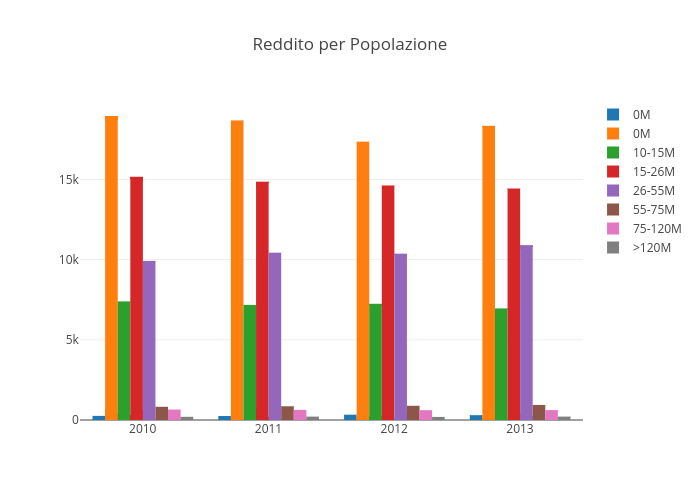

In [33]:
reddito_path = 'imgs/reddito_br.png'
py_on.image.save_as(fig, filename=reddito_path)
from IPython.display import Image
Image(reddito_path)